In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

We have 891 rows and 12 columns.

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here, we have float type values in Age and Fare columns, int type values in passengerid, survived, pclass, sibsp, and parch columns. Object type values in name, sex, ticket, cabin and embarked columns.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, there are missing values present in cabin, age and embarked columns. Lets remove the missing values.

<AxesSubplot:>

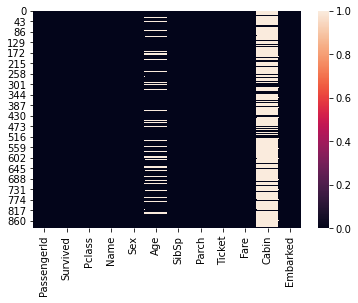

In [6]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Age', ylabel='Density'>

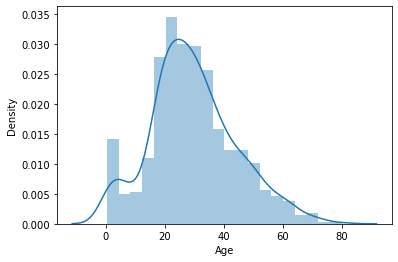

In [7]:
sns.distplot(df['Age'])

Since, the plot is normally distributed, I am applying mean to the age column to remove the missing values.

In [8]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.NaN,strategy='mean')
df['Age']=si.fit_transform(df['Age'].values.reshape(-1,1))

In [9]:
df.drop('Cabin',axis=1,inplace=True)

I have dropped cabin column as there are a lot of missing values.

In [10]:
si=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['Embarked']=si.fit_transform(df['Embarked'].values.reshape(-1,1))

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [12]:
df.shape

(891, 11)

Now, the shape is 891 rows and 11 columns.

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Here, we have float type values in Age and Fare columns, int type values in passengerid, survived, pclass, sibsp, and parch columns. Object type values in name, sex, ticket and embarked columns.

# To check missing values

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now, there are no missing values.

<AxesSubplot:>

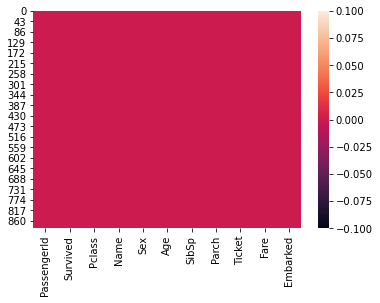

In [15]:
sns.heatmap(df.isnull())

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'].values.reshape(-1,1))

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,0


# Summary Statistics

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000


There is a large difference in 75th percentile and max in PassengerID and Fare columns

# To check correlation

In [19]:
dfcorr=df.corr()
dfcorr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.162098
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.026749,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

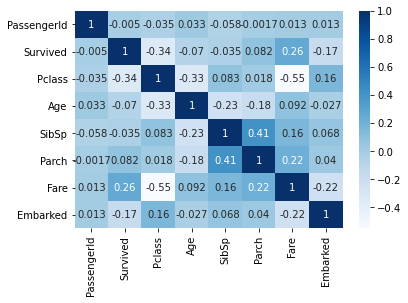

In [20]:
sns.heatmap(dfcorr,cmap='Blues',annot=True)

Fare and Embarked columns are highly negatively correlated.

# EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

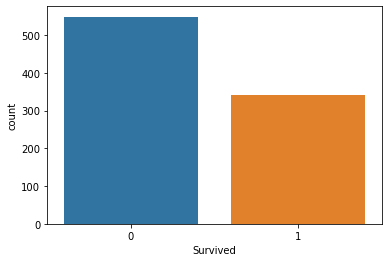

In [21]:
sns.countplot(df['Survived'])

Here, the class is imbalanced but since there is not a large difference between 0 and 1, we csn proceed further.

In [22]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

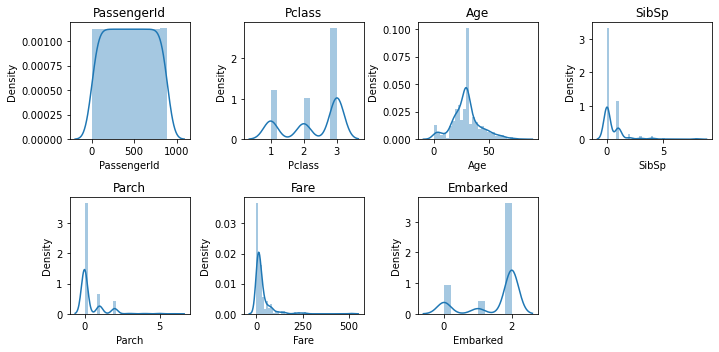

In [23]:
k=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,4,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

Datas are not distributed normally in Sibsp, parch and fare columns.

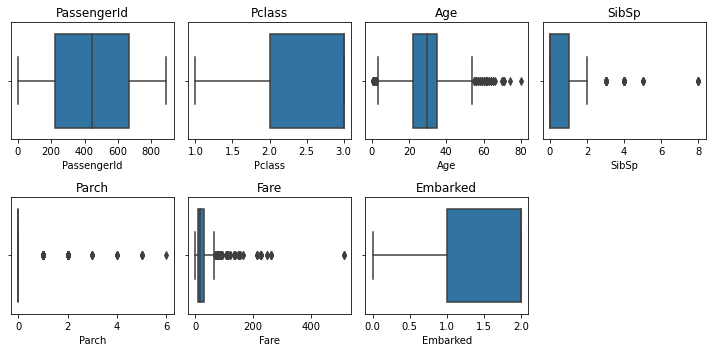

In [24]:
k=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,4,j)
    sns.boxplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()   

There are outliers present in age, sibsp,parch and fare columns.

In [25]:
y=df[['Survived']]

In [26]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [27]:
df.drop('Survived',axis=1,inplace=True)

In [28]:
df.skew()

PassengerId    0.000000
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

There is some skewness present in most of the columns.

In [29]:
df_new=df.copy(deep=True)

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

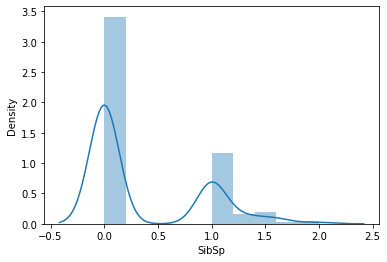

In [30]:
df_new['SibSp']=np.cbrt(df['SibSp'])
sns.distplot(df_new['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

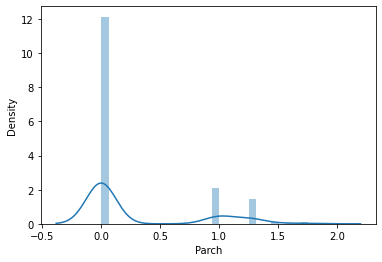

In [31]:
df_new['Parch']=np.cbrt(df['Parch'])
sns.distplot(df_new['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

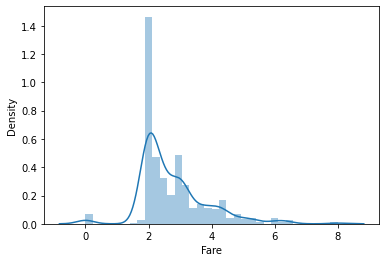

In [32]:
df_new['Fare']=np.cbrt(df['Fare'])
sns.distplot(df_new['Fare'])

In [33]:
df_new.skew()

PassengerId    0.000000
Pclass        -0.630548
Age            0.434488
SibSp          1.033059
Parch          1.348334
Fare           1.230382
Embarked      -1.264823
dtype: float64

The skewness has reduced a bit in sibsp, parch, fare and embarked columns.

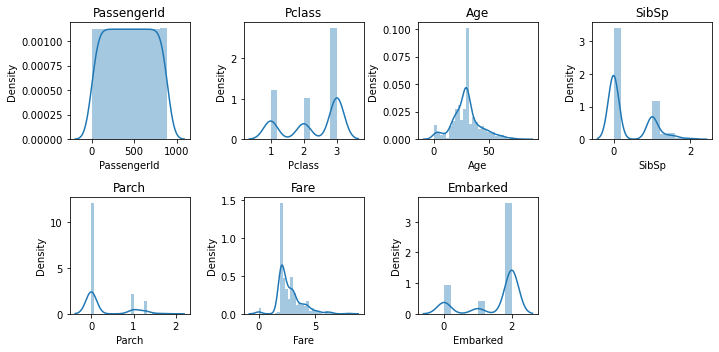

In [34]:
k=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,4,j)
    sns.distplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

Datas are not distributed normally in most of the columns.

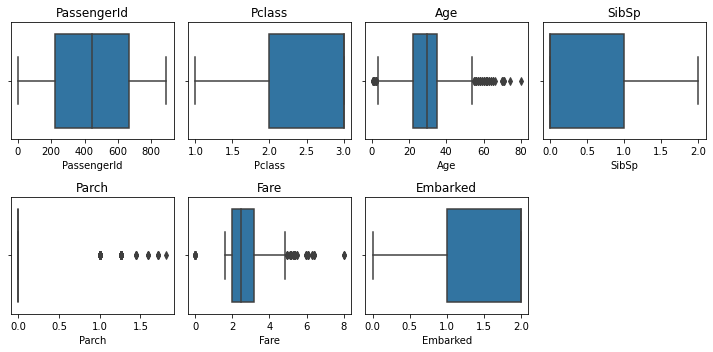

In [35]:
k=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,4,j)
    sns.boxplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

There are outliers present in age, parch and fare columns.

In [36]:
df_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.000000,A/5 21171,1.935438,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.000000,PC 17599,4.146318,0
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.000000,STON/O2. 3101282,1.993730,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.000000,113803,3.758647,2
4,5,3,"Allen, Mr. William Henry",male,35.000000,0.0,0.000000,373450,2.004158,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0.000000,211536,2.351335,2
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0.000000,112053,3.107233,2
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,1.259921,W./C. 6607,2.862294,2
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0.0,0.000000,111369,3.107233,0


In [37]:
df_new['Survived']=y['Survived']
df_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.000000,A/5 21171,1.935438,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.000000,PC 17599,4.146318,0,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.000000,STON/O2. 3101282,1.993730,2,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.000000,113803,3.758647,2,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0.0,0.000000,373450,2.004158,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0.000000,211536,2.351335,2,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0.000000,112053,3.107233,2,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,1.259921,W./C. 6607,2.862294,2,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0.0,0.000000,111369,3.107233,0,1


In [38]:
df_new.drop('Ticket',axis=1,inplace=True)
df_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.000000,1.935438,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.000000,4.146318,0,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.000000,1.993730,2,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.000000,3.758647,2,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0.0,0.000000,2.004158,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0.000000,2.351335,2,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0.000000,3.107233,2,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,1.259921,2.862294,2,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0.0,0.000000,3.107233,0,1


In [39]:
df1=df_new
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.000000,1.935438,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.000000,4.146318,0,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.000000,1.993730,2,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.000000,3.758647,2,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0.0,0.000000,2.004158,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0.000000,2.351335,2,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0.000000,3.107233,2,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,1.259921,2.862294,2,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0.0,0.000000,3.107233,0,1


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Name']=le.fit_transform(df1['Name'].values.reshape(-1,1))
df1['Sex']=le.fit_transform(df1['Sex'].values.reshape(-1,1))

In [41]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,108,1,22.000000,1.0,0.000000,1.935438,2,0
1,2,1,190,0,38.000000,1.0,0.000000,4.146318,0,1
2,3,3,353,0,26.000000,0.0,0.000000,1.993730,2,1
3,4,1,272,0,35.000000,1.0,0.000000,3.758647,2,1
4,5,3,15,1,35.000000,0.0,0.000000,2.004158,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.000000,0.0,0.000000,2.351335,2,0
887,888,1,303,0,19.000000,0.0,0.000000,3.107233,2,1
888,889,3,413,0,29.699118,1.0,1.259921,2.862294,2,0
889,890,1,81,1,26.000000,0.0,0.000000,3.107233,0,1


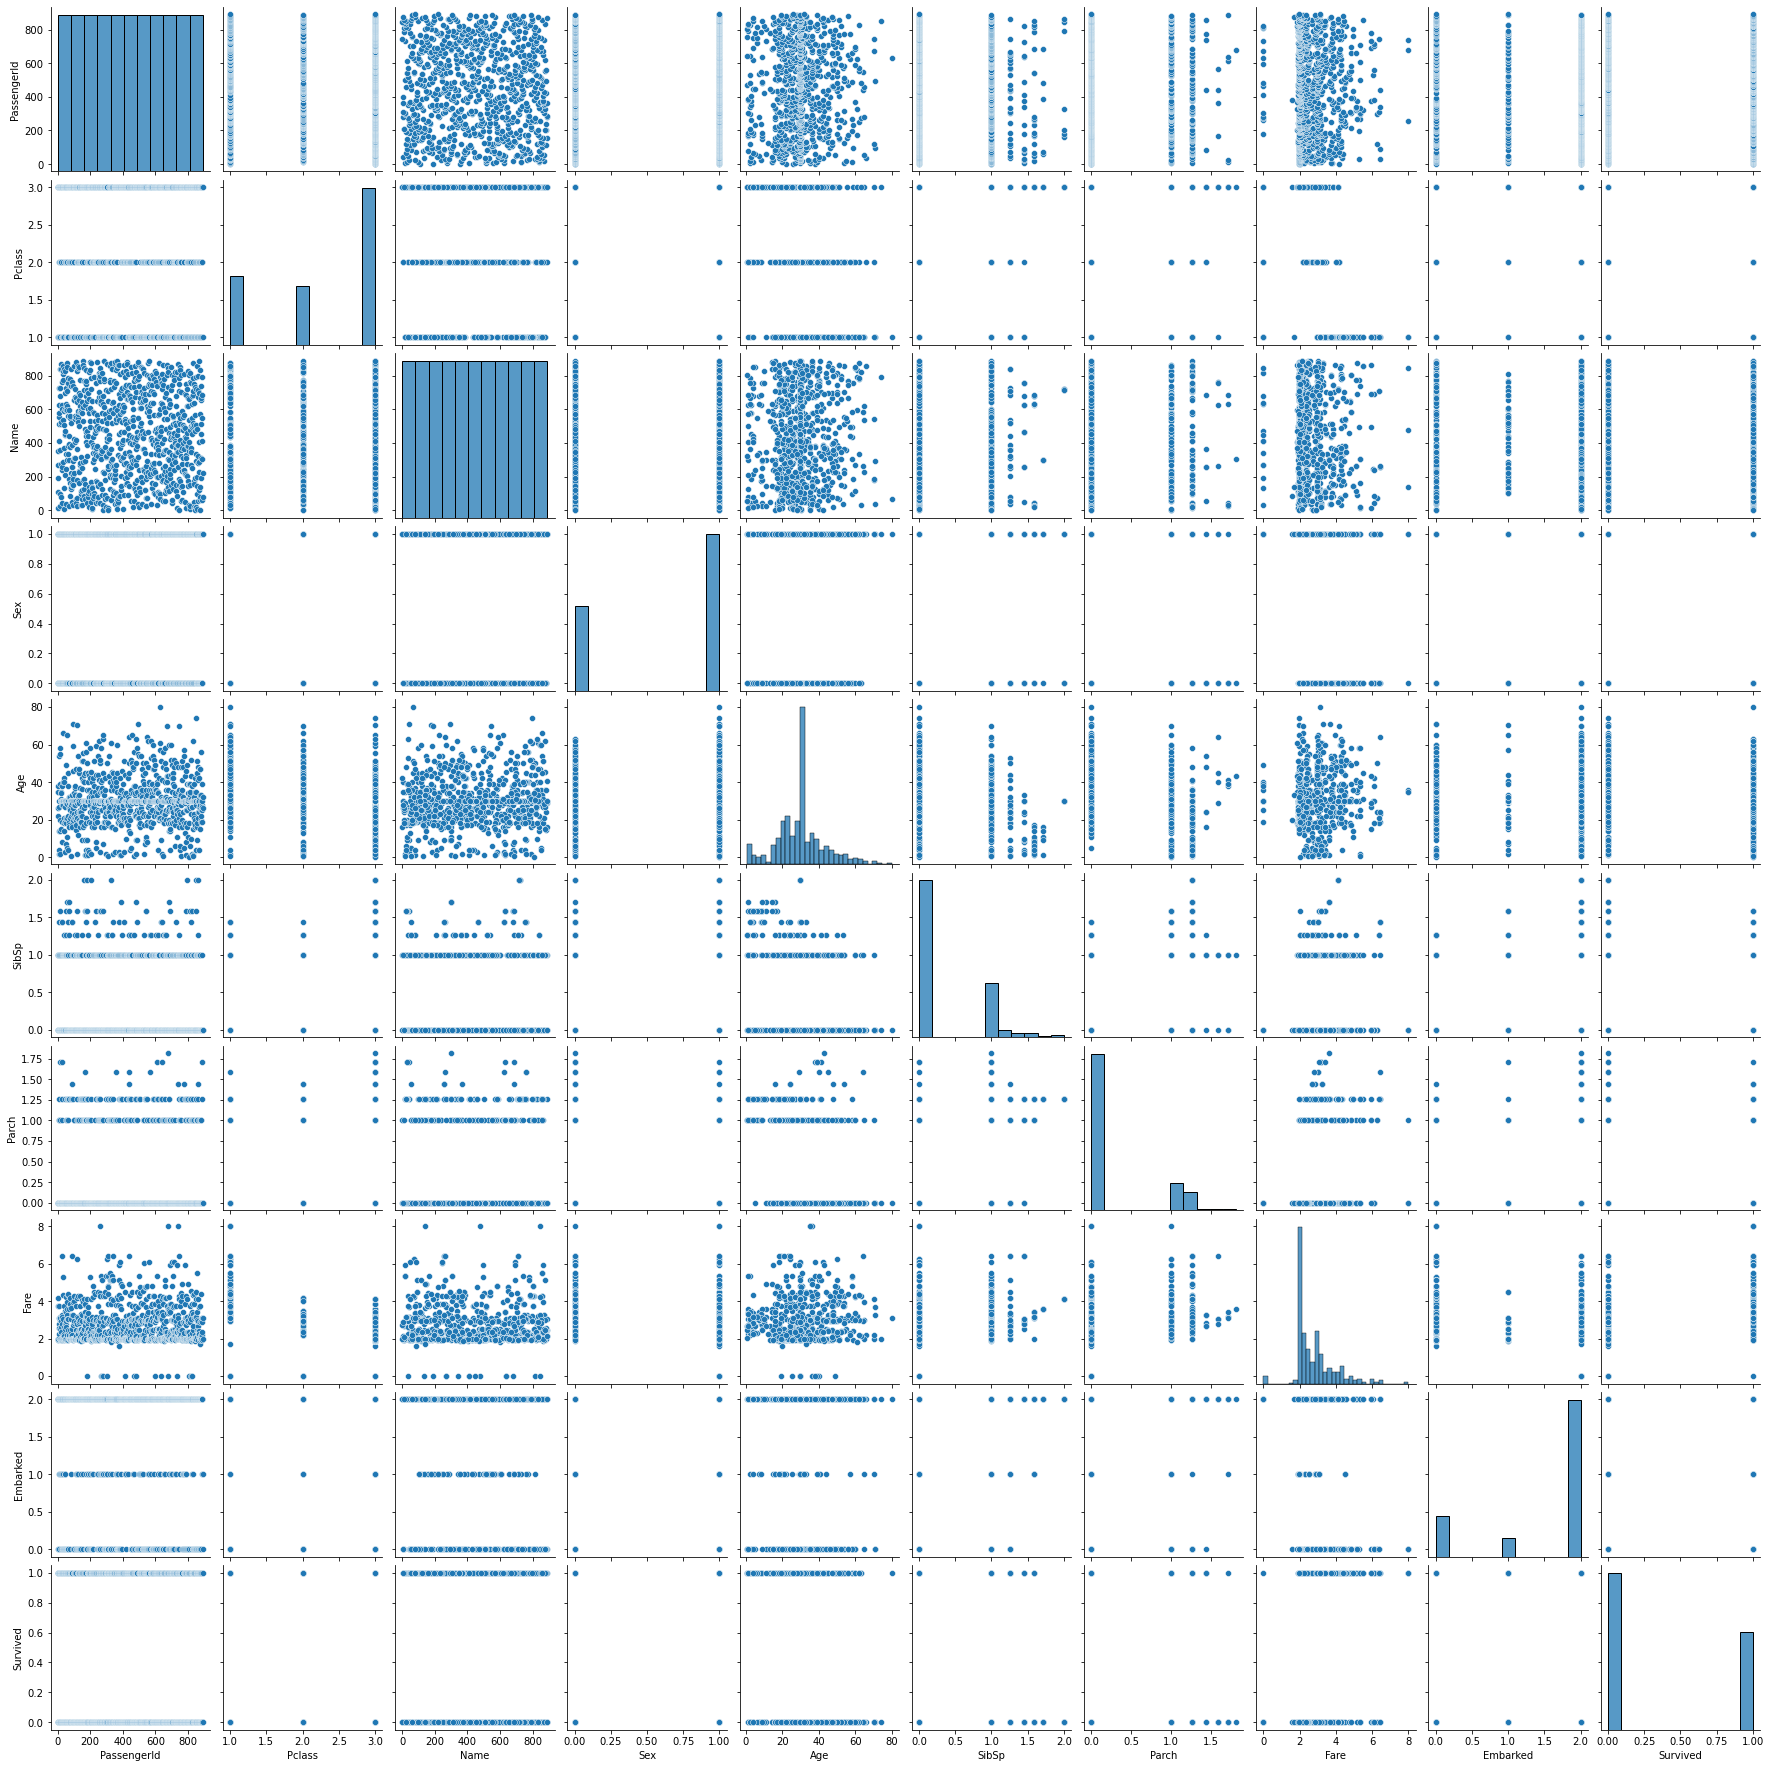

In [42]:
sns.pairplot(df1)

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.73010796, 0.82737724, 1.31021659, ..., 0.77470751, 0.58595414,
        0.78927234],
       [1.72622007, 1.56610693, 0.99141018, ..., 1.28790269, 1.9423032 ,
        1.2669898 ],
       [1.72233219, 0.82737724, 0.35768524, ..., 0.72032473, 0.58595414,
        1.2669898 ],
       ...,
       [1.72233219, 0.82737724, 0.12441226, ..., 0.08999021, 0.58595414,
        0.78927234],
       [1.72622007, 1.56610693, 1.41518943, ..., 0.31850202, 1.9423032 ,
        1.2669898 ],
       [1.73010796, 0.82737724, 0.87477369, ..., 0.73411779, 0.67817453,
        0.78927234]])

In [44]:
print(np.where(z>3))

(array([ 27,  88,  96, 116, 118, 159, 180, 201, 258, 299, 311, 324, 341,
       380, 438, 493, 527, 557, 630, 672, 678, 679, 700, 716, 737, 742,
       745, 792, 846, 851, 863], dtype=int64), array([7, 7, 4, 4, 7, 5, 5, 5, 7, 7, 7, 5, 7, 7, 7, 4, 7, 7, 4, 4, 6, 7,
       7, 7, 7, 7, 4, 5, 5, 4, 5], dtype=int64))


In [45]:
df2=df1[(z<3).all(axis=1)]
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,108,1,22.000000,1.0,0.000000,1.935438,2,0
1,2,1,190,0,38.000000,1.0,0.000000,4.146318,0,1
2,3,3,353,0,26.000000,0.0,0.000000,1.993730,2,1
3,4,1,272,0,35.000000,1.0,0.000000,3.758647,2,1
4,5,3,15,1,35.000000,0.0,0.000000,2.004158,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.000000,0.0,0.000000,2.351335,2,0
887,888,1,303,0,19.000000,0.0,0.000000,3.107233,2,1
888,889,3,413,0,29.699118,1.0,1.259921,2.862294,2,0
889,890,1,81,1,26.000000,0.0,0.000000,3.107233,0,1


In [46]:
df1.shape

(891, 10)

In [47]:
df2.shape

(860, 10)

Here, 31 rows have been removed because of outliers.

In [48]:
x=df2.iloc[:,0:-1]
y=df2.iloc[:,9]

In [49]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,108,1,22.000000,1.0,0.000000,1.935438,2
1,2,1,190,0,38.000000,1.0,0.000000,4.146318,0
2,3,3,353,0,26.000000,0.0,0.000000,1.993730,2
3,4,1,272,0,35.000000,1.0,0.000000,3.758647,2
4,5,3,15,1,35.000000,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.000000,0.0,0.000000,2.351335,2
887,888,1,303,0,19.000000,0.0,0.000000,3.107233,2
888,889,3,413,0,29.699118,1.0,1.259921,2.862294,2
889,890,1,81,1,26.000000,0.0,0.000000,3.107233,0


In [50]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 860, dtype: int64

In [51]:
x.shape

(860, 9)

In [52]:
y.shape

(860,)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc,
        maxRS=i
print('Best accuracy is',maxAcc,'on random state',maxRS)  

Best accuracy is (0.8333333333333334,) on random state 69


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=69)

In [56]:
x_train.shape

(602, 9)

In [57]:
x_test.shape

(258, 9)

In [58]:
y_train.shape

(602,)

In [59]:
y_test.shape

(258,)

In [60]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [61]:
pred=lg.predict(x_test)
pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [62]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8333333333333334
[[139  14]
 [ 29  76]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       153
           1       0.84      0.72      0.78       105

    accuracy                           0.83       258
   macro avg       0.84      0.82      0.82       258
weighted avg       0.83      0.83      0.83       258



In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [64]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8217054263565892
[[129  24]
 [ 22  83]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       153
           1       0.78      0.79      0.78       105

    accuracy                           0.82       258
   macro avg       0.82      0.82      0.82       258
weighted avg       0.82      0.82      0.82       258



In [65]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8023255813953488
[[122  31]
 [ 20  85]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       153
           1       0.73      0.81      0.77       105

    accuracy                           0.80       258
   macro avg       0.80      0.80      0.80       258
weighted avg       0.81      0.80      0.80       258



In [66]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.5930232558139535
[[153   0]
 [105   0]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       153
           1       0.00      0.00      0.00       105

    accuracy                           0.59       258
   macro avg       0.30      0.50      0.37       258
weighted avg       0.35      0.59      0.44       258



In [67]:
svc1=SVC(kernel='linear')
svc1.fit(x_train,y_train)
pred=svc1.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8410852713178295
[[137  16]
 [ 25  80]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       153
           1       0.83      0.76      0.80       105

    accuracy                           0.84       258
   macro avg       0.84      0.83      0.83       258
weighted avg       0.84      0.84      0.84       258



In [68]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6046511627906976
[[142  11]
 [ 91  14]]
              precision    recall  f1-score   support

           0       0.61      0.93      0.74       153
           1       0.56      0.13      0.22       105

    accuracy                           0.60       258
   macro avg       0.58      0.53      0.48       258
weighted avg       0.59      0.60      0.52       258



In [69]:
rf=RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8643410852713178
[[144   9]
 [ 26  79]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       153
           1       0.90      0.75      0.82       105

    accuracy                           0.86       258
   macro avg       0.87      0.85      0.86       258
weighted avg       0.87      0.86      0.86       258



# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.73837209 0.80232558 0.77325581 0.76744186 0.79069767]
0.7744186046511629


In [71]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.68023256 0.78488372 0.78488372 0.77325581 0.79651163]
0.7639534883720931


In [72]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.65116279 0.78488372 0.77325581 0.77325581 0.81395349]
0.7593023255813953


In [73]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())

[0.61627907 0.61627907 0.61627907 0.61627907 0.61627907]
0.6162790697674418


In [74]:
score=cross_val_score(svc1,x,y,cv=5)
print(score)
print(score.mean())

[0.79651163 0.80813953 0.77906977 0.76162791 0.79651163]
0.7883720930232558


In [75]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.60465116 0.55232558 0.55813953 0.5872093  0.61627907]
0.5837209302325581


In [76]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.79651163 0.80813953 0.84883721 0.84883721 0.8372093 ]
0.8279069767441859


# Hyper Parameter Tuning

We use this technique to improve the accuracy of the best model that we have choosen.

In [91]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameters={'n_estimators':[90,100],
            'criterion':['gini','entropy'],
            'max_depth':range(2,20,2),
            'max_features':['auto','sqrt','log2']}

In [83]:
gs1=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
gs1.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [90, 100]})

In [84]:
print(gs1.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 90}


In [90]:
rfmodel=RandomForestClassifier(criterion='entropy',max_features='log2',n_estimators=90)
rfmodel.fit(x_train,y_train)
score=rfmodel.score(x_train,y_train)
print(score)

1.0


# Saving the model

In [92]:
import joblib
joblib.dump(rfmodel,'rfmodel.obj')

['rfmodel.obj']